In [16]:
slices = [59219, 55466, 47544, 36443, 35917]
langs = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']

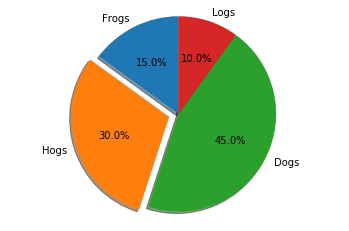

In [17]:
import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('hist_data.csv')

In [2]:
data.head()

,Responder_id,Age
0,1,14
1,2,19
2,3,28
3,4,22
4,5,30


In [3]:
data.shape

(79210, 2)

In [5]:
data.Age.max()  # sütuna direkte bakabiliyoruz

99

In [6]:
data.Age.median()

29.0

In [13]:
mean = data.Age.mean()

In [14]:
ages = data["Age"]

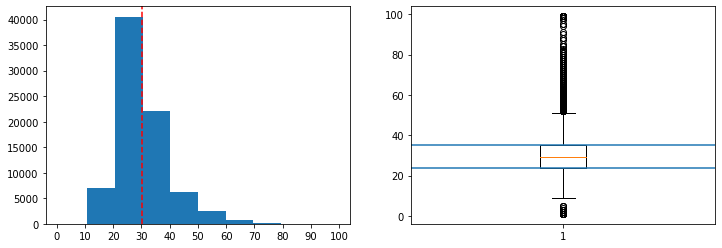

In [24]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].hist(ages, bins=10)
ax[0].axvline(mean, color = "r", ls = "--")
ax[0].set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax[1].boxplot(ages)
ax[1].axhline(24)
ax[1].axhline(35);

In [26]:
from scipy.stats import iqr
q75, q25 = np.percentile(ages, [75, 25])

print("q1:", q25)
print("q3:", q75)
print("iqr:", iqr(ages))
print("lower_bound:", q25-(1.5*iqr(ages)))
print("upper_bound:", q75+(1.5*iqr(ages)))
print("min_value:", min(ages))
print("max_value:", max(ages))

q1: 24.0
q3: 35.0
iqr: 11.0
lower_bound: 7.5
upper_bound: 51.5
min_value: 1
max_value: 99


In [27]:
df = pd.read_csv('scatter_data.csv')

In [28]:
df.head()

,view_count,likes,ratio
0,8036001,324742,96.91
1,9378067,562589,98.19
2,2182066,273650,99.38
3,6525864,94698,96.25
4,9481284,582481,97.22


In [30]:
df.shape

(200, 3)

In [31]:
df.corr()

,view_count,likes,ratio
view_count,1.000000,0.936048,0.038939
likes,0.936048,1.000000,0.090327
ratio,0.038939,0.090327,1.000000


In [36]:
view_count = df["view_count"]
likes = df["likes"]

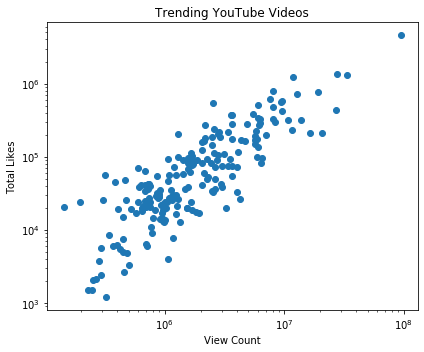

In [39]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.scatter(view_count, likes)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title('Trending YouTube Videos')
ax.set_xlabel('View Count')
ax.set_ylabel('Total Likes')

plt.tight_layout()

### Time Series

In [43]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [1]:
from pandas_datareader import data
from datetime import datetime
start = datetime(2020, 1, 1)
end = datetime(2020, 8, 30)

In [2]:
f = data.DataReader(name="AAPL", data_source="av-daily", start=start, end=end, api_key = "CI1UUA44YI12JAB3")

In [3]:
f.head()  # apple hisseleri

,open,high,low,close,volume
2020-01-02,296.24,300.60,295.19,300.35,33870100
2020-01-03,297.15,300.58,296.50,297.43,36580700
2020-01-06,293.79,299.96,292.75,299.80,29596800
2020-01-07,299.84,300.90,297.48,298.39,27218000
2020-01-08,297.16,304.44,297.16,303.19,33019800


In [7]:
g = data.DataReader(name="GOOG", data_source="av-daily", start=start, end=end, api_key = "CI1UUA44YI12JAB3")

In [8]:
g.head()  # google hisseleri

,open,high,low,close,volume
2020-01-02,1341.55,1368.14,1341.55,1367.37,1406731
2020-01-03,1347.86,1372.50,1345.54,1360.66,1187006
2020-01-06,1350.00,1396.50,1350.00,1394.21,1733149
2020-01-07,1397.94,1402.99,1390.38,1393.34,1511693
2020-01-08,1392.08,1411.58,1390.84,1404.32,1529177


In [9]:
a = data.DataReader(name="AMZN", data_source="av-daily", start=start, end=end, api_key = "CI1UUA44YI12JAB3")

In [10]:
a.head()  # amazon hisseleri

,open,high,low,close,volume
2020-01-02,1875.00,1898.01,1864.15,1898.01,4035910
2020-01-03,1864.50,1886.20,1864.50,1874.97,3766604
2020-01-06,1860.00,1903.69,1860.00,1902.88,4065698
2020-01-07,1904.50,1913.89,1892.04,1906.86,4134010
2020-01-08,1898.04,1911.00,1886.44,1891.97,3511966


In [11]:
a.tail()

,open,high,low,close,volume
2020-08-24,3310.15,3380.3150,3257.5608,3307.46,4666258
2020-08-25,3294.99,3357.4000,3267.0000,3346.49,3992842
2020-08-26,3351.11,3451.7387,3344.5675,3441.85,6508743
2020-08-27,3450.05,3453.0000,3378.0000,3400.00,4264795
2020-08-28,3423.00,3433.3699,3386.5000,3401.80,2896978


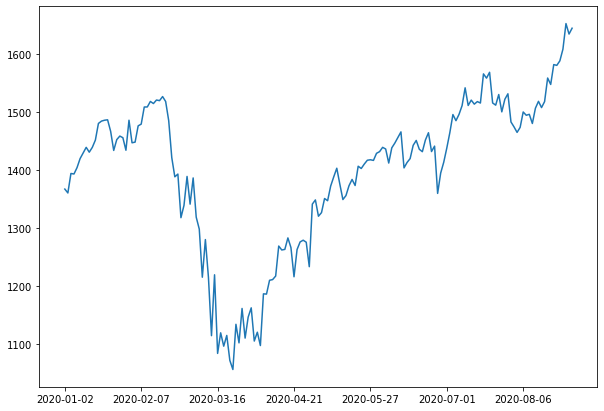

In [15]:
f.close.plot(figsize=(10,7));  # apple hisselerinin durumu PANDAS ile

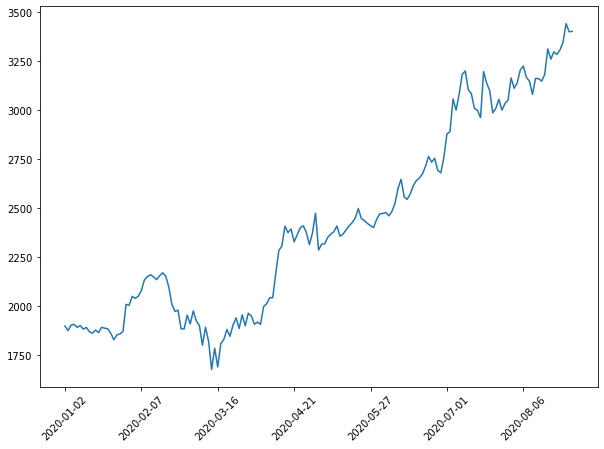

In [17]:
a.close.plot(figsize=(10,7), rot = 45);  # Amazon hisselerinin durumu

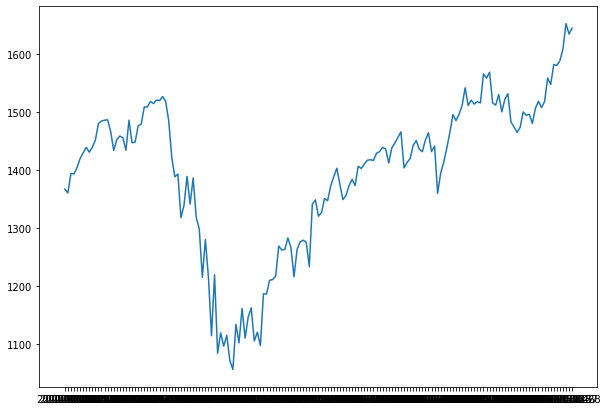

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(f.close.index, f.close);  # dataframelerde sütunlar dot notation ile de olabiliyor.

In [21]:
f.index = pd.to_datetime(f.index)

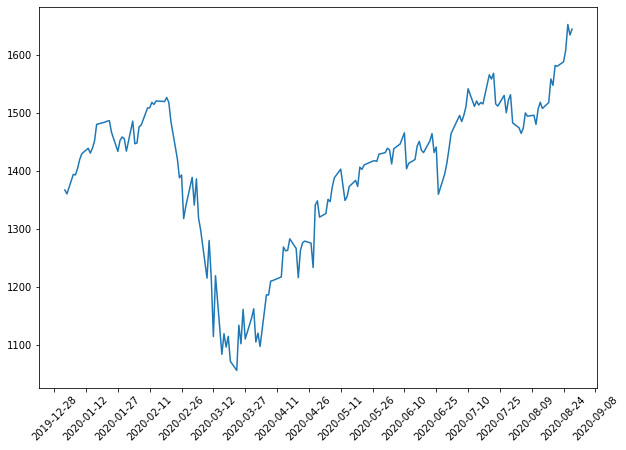

In [22]:
import matplotlib.dates as mdates
import numpy as np

fig, ax = plt.subplots(figsize=(10,7))
#ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))

ax.set_xticklabels(f.index, rotation=45)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.plot(f.close.index, f.close);